In [1]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [2]:
import glob
import json
from math import log

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from torch import tensor
from tqdm import tqdm

import utils
from einet_addons import EiNetForest, log_likelihood, log_posterior

plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_387536/3474687320.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
bin_g = []
for directory in sorted(glob.glob("outputs/bin_g_rg/*history.csv")):
    num_mixture = directory.split("/")[-1].split("-")[1]
    df = pd.read_csv(directory)
    df["model"] = "BIN-G"
    df["num_mixture"] = int(num_mixture)

    args = torch.load(directory.replace("history.csv", "params.pt"))
    model = EiNetForest(args["region_graph"], args["args"]).cpu()
    model.initialize()
    model.load_state_dict(args["params"])
    df["param_count"] = sum(p.numel() for p in model.parameters())
    torch.cuda.empty_cache()

    for row in df.iloc:
        d = row.to_dict()
        bin_g.append(
            {
                "Model": d["model"],
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_train"],
                "Subset": "Train",
            }
        )

        bin_g.append(
            {
                "Model": d["model"],
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_valid"],
                "Subset": "Valid",
            }
        )

bin_g = pd.DataFrame(bin_g)
bin_g

,Model,Mixture Count,Parameter Count,Epoch,Avg. Neg. Log-Likelihood,Subset
0,BIN-G,5,38324,1,18.265367,Train
1,BIN-G,5,38324,1,18.386812,Valid
2,BIN-G,5,38324,2,14.906649,Train
3,BIN-G,5,38324,2,15.037800,Valid
4,BIN-G,5,38324,3,14.725815,Train
...,...,...,...,...,...,...
9227,BIN-G,20,772454,198,13.811187,Valid
9228,BIN-G,20,772454,199,13.658948,Train
9229,BIN-G,20,772454,199,13.811771,Valid
9230,BIN-G,20,772454,200,13.658651,Train


In [4]:
bin_g_no_repeat = []
for directory in sorted(glob.glob("outputs/bin_g_rg_no_repetition/*history.csv")):
    num_mixture = directory.split("/")[-1].split("-")[1]
    df = pd.read_csv(directory)
    df["model"] = "BIN-G (No Repetition)"
    df["num_mixture"] = int(num_mixture)

    args = torch.load(directory.replace("history.csv", "params.pt"))
    model = EiNetForest(args["region_graph"], args["args"]).cpu()
    model.initialize()
    model.load_state_dict(args["params"])
    df["param_count"] = sum(p.numel() for p in model.parameters())
    torch.cuda.empty_cache()

    for row in df.iloc:
        d = row.to_dict()
        bin_g_no_repeat.append(
            {
                "Model": d["model"],
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_train"],
                "Subset": "Train",
            }
        )

        bin_g_no_repeat.append(
            {
                "Model": d["model"],
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_valid"],
                "Subset": "Valid",
            }
        )

bin_g_no_repeat = pd.DataFrame(bin_g_no_repeat)
bin_g_no_repeat

,Model,Mixture Count,Parameter Count,Epoch,Avg. Neg. Log-Likelihood,Subset
0,BIN-G (No Repetition),5,16525,1,18.265427,Train
1,BIN-G (No Repetition),5,16525,1,18.385706,Valid
2,BIN-G (No Repetition),5,16525,2,14.933408,Train
3,BIN-G (No Repetition),5,16525,2,15.066035,Valid
4,BIN-G (No Repetition),5,16525,3,14.804098,Train
...,...,...,...,...,...,...
8231,BIN-G (No Repetition),20,353200,198,13.865028,Valid
8232,BIN-G (No Repetition),20,353200,199,13.717582,Train
8233,BIN-G (No Repetition),20,353200,199,13.862988,Valid
8234,BIN-G (No Repetition),20,353200,200,13.717415,Train


In [5]:
rat_spn = []
for directory in sorted(
    glob.glob("outputs/rat_spn_rg_depth_02_repetition_05/*history.csv")
):
    num_mixture = directory.split("/")[-1].split("-")[1]
    df = pd.read_csv(directory)
    df["model"] = "RAT-SPN"
    df["num_mixture"] = int(num_mixture)

    args = torch.load(directory.replace("history.csv", "params.pt"))
    model = EiNetForest(args["region_graph"], args["args"]).cpu()
    model.initialize()
    model.load_state_dict(args["params"])
    df["param_count"] = sum(p.numel() for p in model.parameters())
    torch.cuda.empty_cache()

    for row in df.iloc:
        d = row.to_dict()
        rat_spn.append(
            {
                "Model": d["model"] + "-01",
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_train"],
                "Subset": "Train",
            }
        )

        rat_spn.append(
            {
                "Model": d["model"] + "-01",
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_valid"],
                "Subset": "Valid",
            }
        )

rat_spn1 = pd.DataFrame(rat_spn)
rat_spn1

,Model,Mixture Count,Parameter Count,Epoch,Avg. Neg. Log-Likelihood,Subset
0,RAT-SPN-01,5,59380,1,17.492304,Train
1,RAT-SPN-01,5,59380,1,17.614324,Valid
2,RAT-SPN-01,5,59380,2,13.527246,Train
3,RAT-SPN-01,5,59380,2,13.664724,Valid
4,RAT-SPN-01,5,59380,3,13.197501,Train
...,...,...,...,...,...,...
6063,RAT-SPN-01,20,314005,97,12.532487,Valid
6064,RAT-SPN-01,20,314005,98,12.051086,Train
6065,RAT-SPN-01,20,314005,98,12.537005,Valid
6066,RAT-SPN-01,20,314005,99,12.050202,Train


In [6]:
rat_spn = []
for directory in sorted(
    glob.glob("outputs/rat_spn_rg_depth_04_repetition_05/*history.csv")
):
    num_mixture = directory.split("/")[-1].split("-")[1]
    df = pd.read_csv(directory)
    df["model"] = "RAT-SPN"
    df["num_mixture"] = int(num_mixture)

    args = torch.load(directory.replace("history.csv", "params.pt"))
    model = EiNetForest(args["region_graph"], args["args"]).cpu()
    model.initialize()
    model.load_state_dict(args["params"])
    df["param_count"] = sum(p.numel() for p in model.parameters())
    torch.cuda.empty_cache()

    for row in df.iloc:
        d = row.to_dict()
        rat_spn.append(
            {
                "Model": d["model"] + "-02",
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_train"],
                "Subset": "Train",
            }
        )

        rat_spn.append(
            {
                "Model": d["model"] + "-02",
                "Mixture Count": d["num_mixture"],
                "Parameter Count": d["param_count"],
                "Epoch": d["epoch"],
                "Avg. Neg. Log-Likelihood": d["avg_nll_valid"],
                "Subset": "Valid",
            }
        )

rat_spn2 = pd.DataFrame(rat_spn)
rat_spn2

,Model,Mixture Count,Parameter Count,Epoch,Avg. Neg. Log-Likelihood,Subset
0,RAT-SPN-02,5,66880,1,17.459693,Train
1,RAT-SPN-02,5,66880,1,17.569254,Valid
2,RAT-SPN-02,5,66880,2,13.537991,Train
3,RAT-SPN-02,5,66880,2,13.670150,Valid
4,RAT-SPN-02,5,66880,3,13.329437,Train
...,...,...,...,...,...,...
7495,RAT-SPN-02,20,794005,145,13.290293,Valid
7496,RAT-SPN-02,20,794005,146,13.011772,Train
7497,RAT-SPN-02,20,794005,146,13.290306,Valid
7498,RAT-SPN-02,20,794005,147,13.011446,Train


In [7]:
graphs = [
    "bin_g_rg_no_repetition",
    "bin_g_rg",
    "rat_spn_rg_depth_02_repetition_05",
    "rat_spn_rg_depth_04_repetition_05",
]
model_map = {
    graphs[0]: "BIN-G (Structure Only)",
    graphs[1]: "BIN-G",
    graphs[2]: "RAT-SPN-01",
    graphs[3]: "RAT-SPN-02",
}

dataloader_train = torch.utils.data.DataLoader(
    dataset=utils.dataset.ObjectCooccurrenceCOCODataset(
        "dataset/coco2017-cooccurences-train.csv"
    ),
    batch_size=512,
)
dataloader_valid = torch.utils.data.DataLoader(
    dataset=utils.dataset.ObjectCooccurrenceCOCODataset(
        "dataset/coco2017-cooccurences-valid.csv"
    ),
    batch_size=512,
)

device = "cuda"

eval_result = []
pbar = tqdm()
for rg in graphs:
    model = model_map[rg]

    for ckpt in glob.glob(f"outputs/{rg}/*.pt"):
        d_train = {"Model": model}
        d_valid = {"Model": model}
        hps = ckpt.split("/")[-1].split("-")

        d_train["Mixture Count"] = int(hps[1])
        d_valid["Mixture Count"] = d_train["Mixture Count"]
        d_train["Seed"] = int(hps[3])
        d_valid["Seed"] = d_train["Seed"]

        args = torch.load(ckpt)
        einet = EiNetForest(args["region_graph"], args["args"]).cpu()
        einet.initialize()
        einet.load_state_dict(args["params"])

        d_train["Parameter Count"] = sum(p.numel() for p in einet.parameters())
        d_valid["Parameter Count"] = d_train["Parameter Count"]

        d_train["Avg. Neg. Log-Likelihood"] = -log_likelihood(
            dataloader_train, einet, device
        )
        d_valid["Avg. Neg. Log-Likelihood"] = -log_likelihood(
            dataloader_valid, einet, device
        )

        d_train["Avg. Neg. Log-Likelihood"] /= len(dataloader_train.dataset)
        d_valid["Avg. Neg. Log-Likelihood"] /= len(dataloader_valid.dataset)

        d_train["Subset"] = "Train"
        d_valid["Subset"] = "Valid"

        eval_result.extend([d_train, d_valid])
        pbar.update()
pbar.close()

df_eval = pd.DataFrame(eval_result)
df_eval

100it [09:48,  5.89s/it]


,Model,Mixture Count,Seed,Parameter Count,Avg. Neg. Log-Likelihood,Subset
0,BIN-G (Structure Only),1,1,2365,14.804744,Train
1,BIN-G (Structure Only),1,1,2365,14.961439,Valid
2,BIN-G (Structure Only),10,5,61900,13.687228,Train
3,BIN-G (Structure Only),10,5,61900,13.839053,Valid
4,BIN-G (Structure Only),1,3,2365,14.804894,Train
...,...,...,...,...,...,...
195,RAT-SPN-02,5,5,66880,13.259505,Valid
196,RAT-SPN-02,10,2,186505,12.959209,Train
197,RAT-SPN-02,10,2,186505,13.230542,Valid
198,RAT-SPN-02,15,1,411380,12.949654,Train


In [8]:
df_eval[df_eval["Subset"] == "Train"].groupby(["Model", "Mixture Count"]).min(
    numeric_only=True
)

Seed  Parameter Count  \
Model                  Mixture Count                          
BIN-G                  1                 1             5652   
                       5                 1            38324   
                       10                1           138834   
                       15                1           363044   
                       20                1           772454   
BIN-G (Structure Only) 1                 1             2365   
                       5                 1            16525   
                       10                1            61900   
                       15                1           164625   
                       20                1           353200   
RAT-SPN-01             1                 1            11620   
                       5                 1            59380   
                       10                1           126505   
                       15                1           208880   
                       20                1           314005   
RAT-SPN-02             1                 1            11680   
                       5                 1            66880   
                       10                1           186505   
                       15                1           411380   
                       20                1           794005   

                                      Avg. Neg. Log-Likelihood  
Model                  Mixture Count                            
BIN-G                  1                             14.342991  
                       5                             13.603921  
                       10                            13.624039  
                       15                            13.636860  
                       20                            13.637537  
BIN-G (Structure Only) 1                             14.804744  
                       5                             13.650128  
                       10                            13.687228  
                       15                            13.695331  
                       20                            13.715899  
RAT-SPN-01             1                             13.353976  
                       5                             12.535510  
                       10                            12.225068  
                       15                            12.087517  
                       20                            12.044483  
RAT-SPN-02             1                             13.353871  
                       5                             12.919553  
                       10                            12.959209  
                       15                            12.949654  
                       20                            13.001979

In [9]:
df_eval[df_eval["Subset"] == "Valid"].groupby(["Model", "Mixture Count"]).min(
    numeric_only=True
)

Seed  Parameter Count  \
Model                  Mixture Count                          
BIN-G                  1                 1             5652   
                       5                 1            38324   
                       10                1           138834   
                       15                1           363044   
                       20                1           772454   
BIN-G (Structure Only) 1                 1             2365   
                       5                 1            16525   
                       10                1            61900   
                       15                1           164625   
                       20                1           353200   
RAT-SPN-01             1                 1            11620   
                       5                 1            59380   
                       10                1           126505   
                       15                1           208880   
                       20                1           314005   
RAT-SPN-02             1                 1            11680   
                       5                 1            66880   
                       10                1           186505   
                       15                1           411380   
                       20                1           794005   

                                      Avg. Neg. Log-Likelihood  
Model                  Mixture Count                            
BIN-G                  1                             14.492683  
                       5                             13.746977  
                       10                            13.772346  
                       15                            13.790332  
                       20                            13.791889  
BIN-G (Structure Only) 1                             14.960843  
                       5                             13.790964  
                       10                            13.839053  
                       15                            13.839808  
                       20                            13.865334  
RAT-SPN-01             1                             13.539816  
                       5                             12.806517  
                       10                            12.580725  
                       15                            12.508610  
                       20                            12.528763  
RAT-SPN-02             1                             13.541505  
                       5                             13.159603  
                       10                            13.230542  
                       15                            13.243807  
                       20                            13.288864

In [10]:
df_eval[
    df_eval["Avg. Neg. Log-Likelihood"]
    == df_eval[df_eval["Subset"] == "Valid"]["Avg. Neg. Log-Likelihood"].min()
]

,Model,Mixture Count,Seed,Parameter Count,Avg. Neg. Log-Likelihood,Subset
111,RAT-SPN-01,15,4,208880,12.50861,Valid


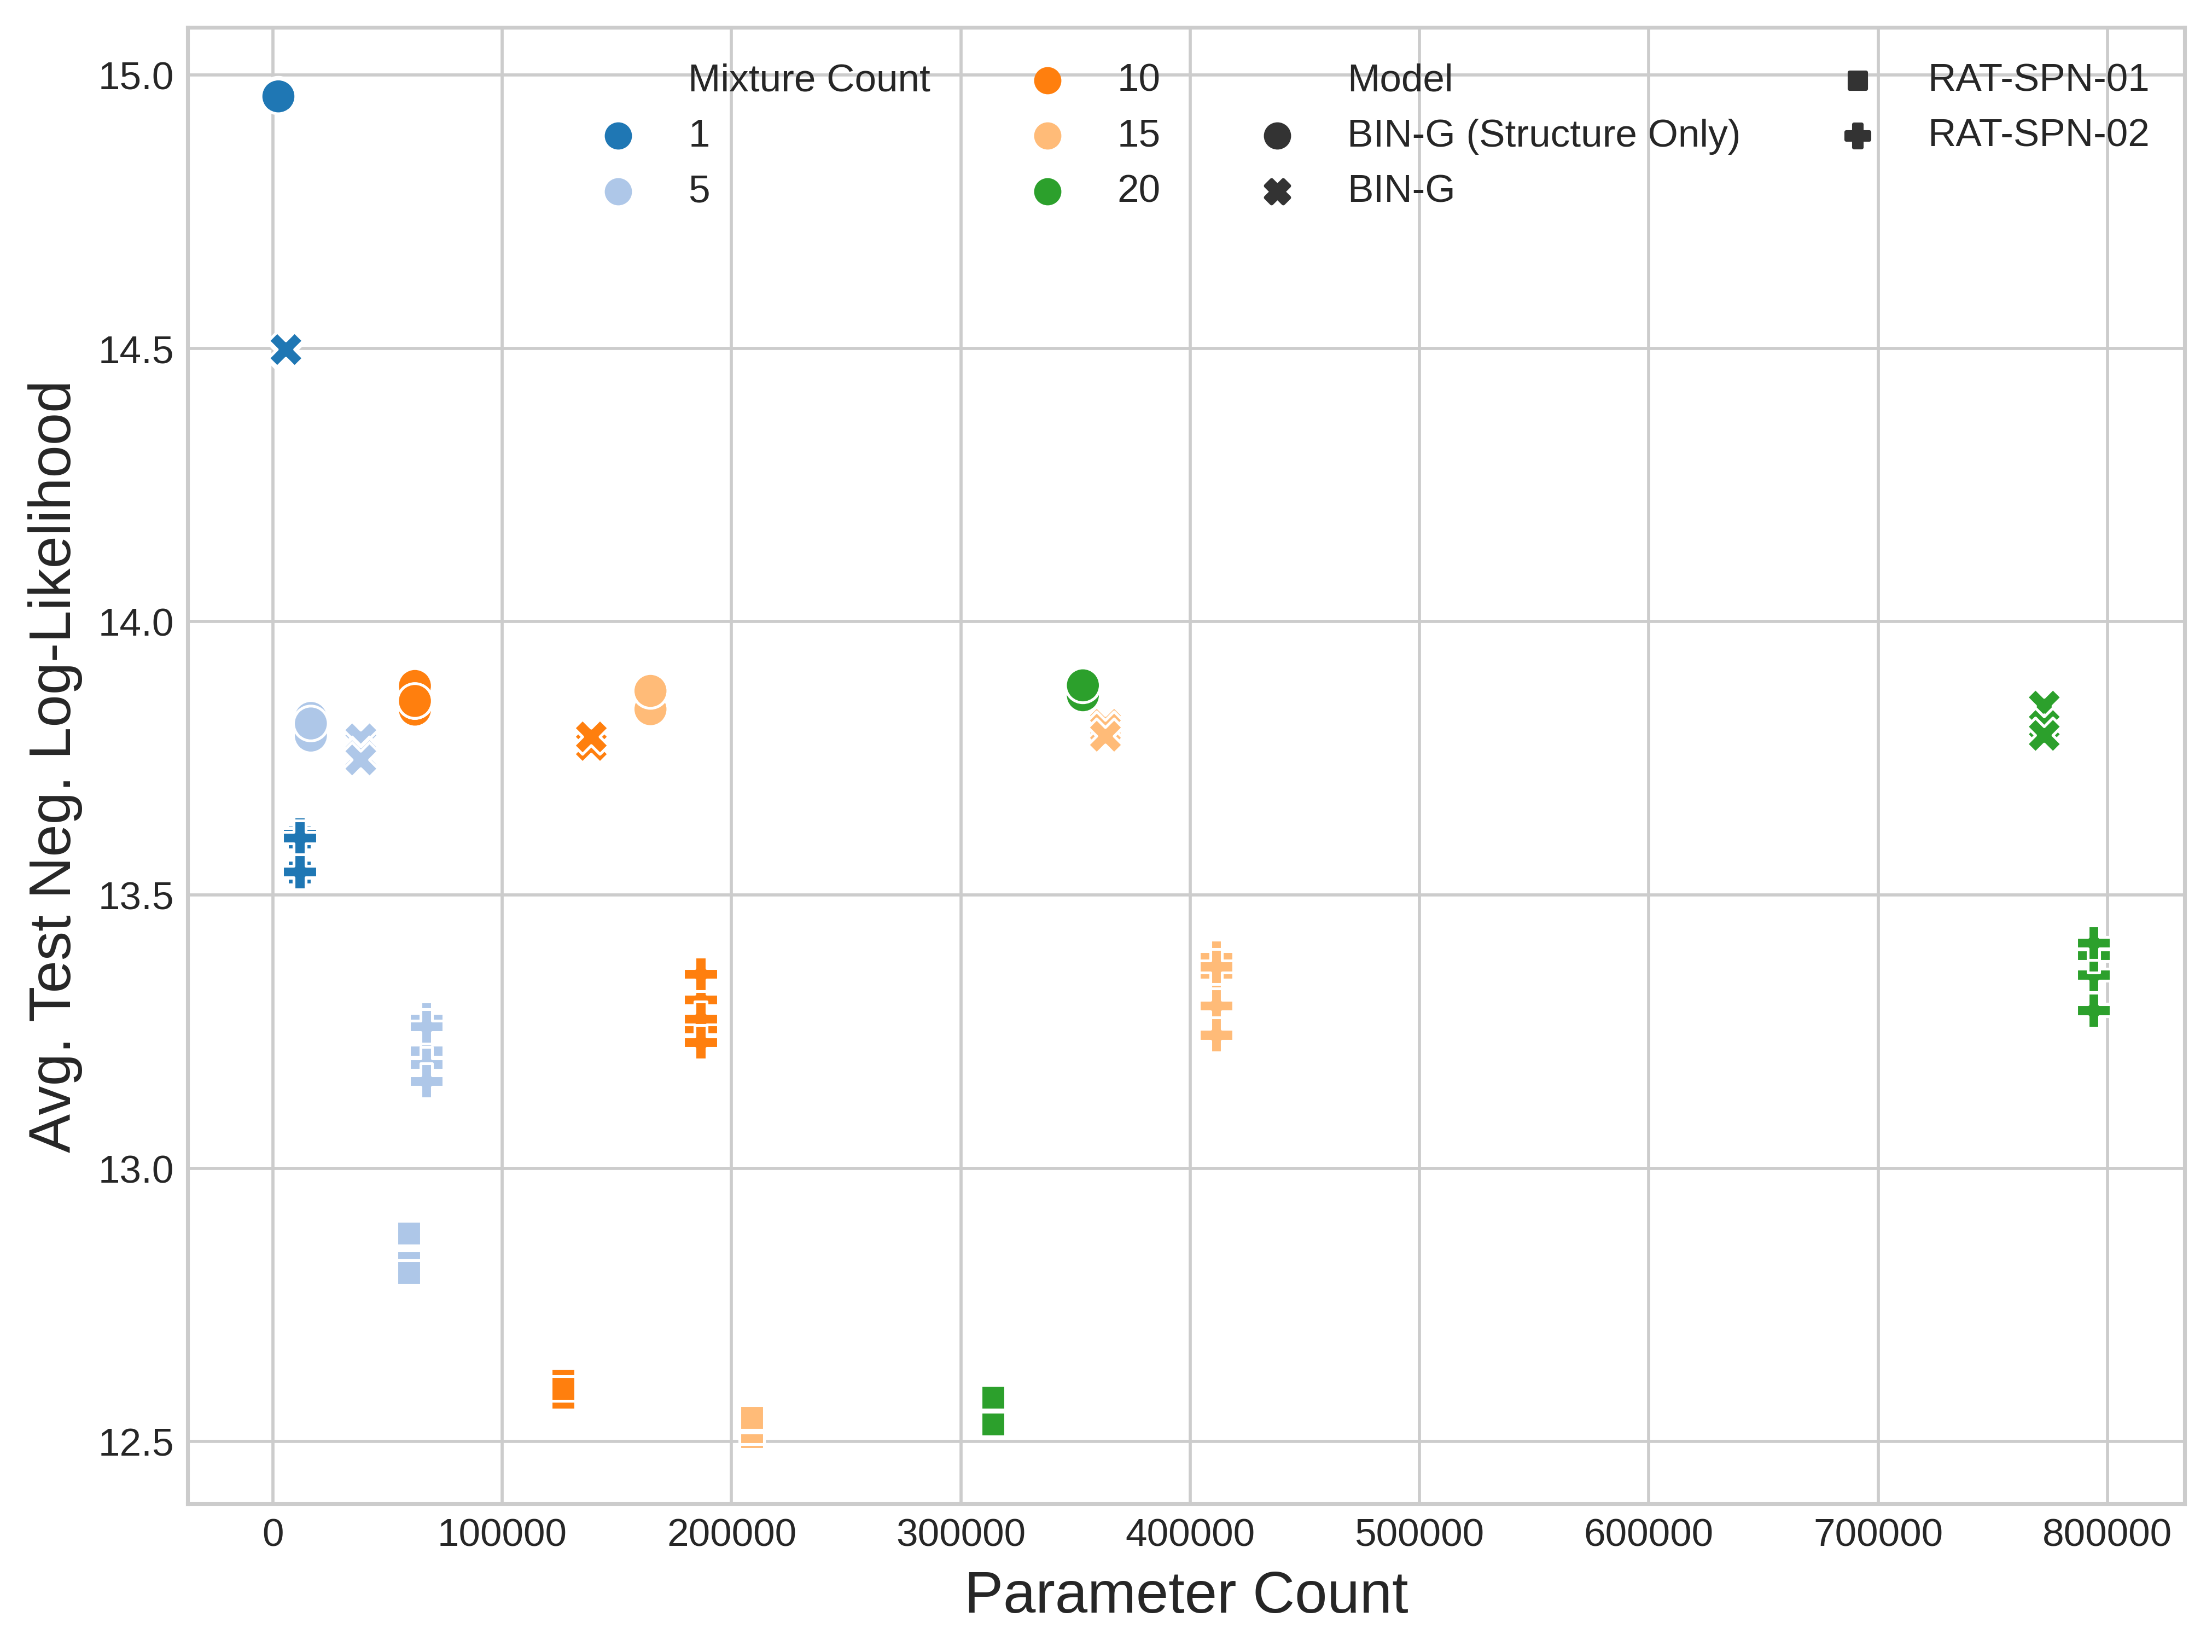

In [23]:
plt.figure(figsize=(8, 6), dpi=512)
sns.scatterplot(
    data=df_eval[df_eval["Subset"] == "Valid"],
    x="Parameter Count",
    y="Avg. Neg. Log-Likelihood",
    # marker="X",
    style="Model",
    hue="Mixture Count",
    s=80,
    palette="tab20",
    # err_kws=dict(capthick=40),
    # err_style='bars'
)

# plt.title("Model Scaling", loc="Left")
plt.ylabel("Avg. Test Neg. Log-Likelihood", fontsize=15)
plt.xlabel("Parameter Count", fontsize=15)
plt.legend(ncol=4, fontsize=10)
plt.tight_layout()
plt.savefig("outputs/einet/scaling.pdf")

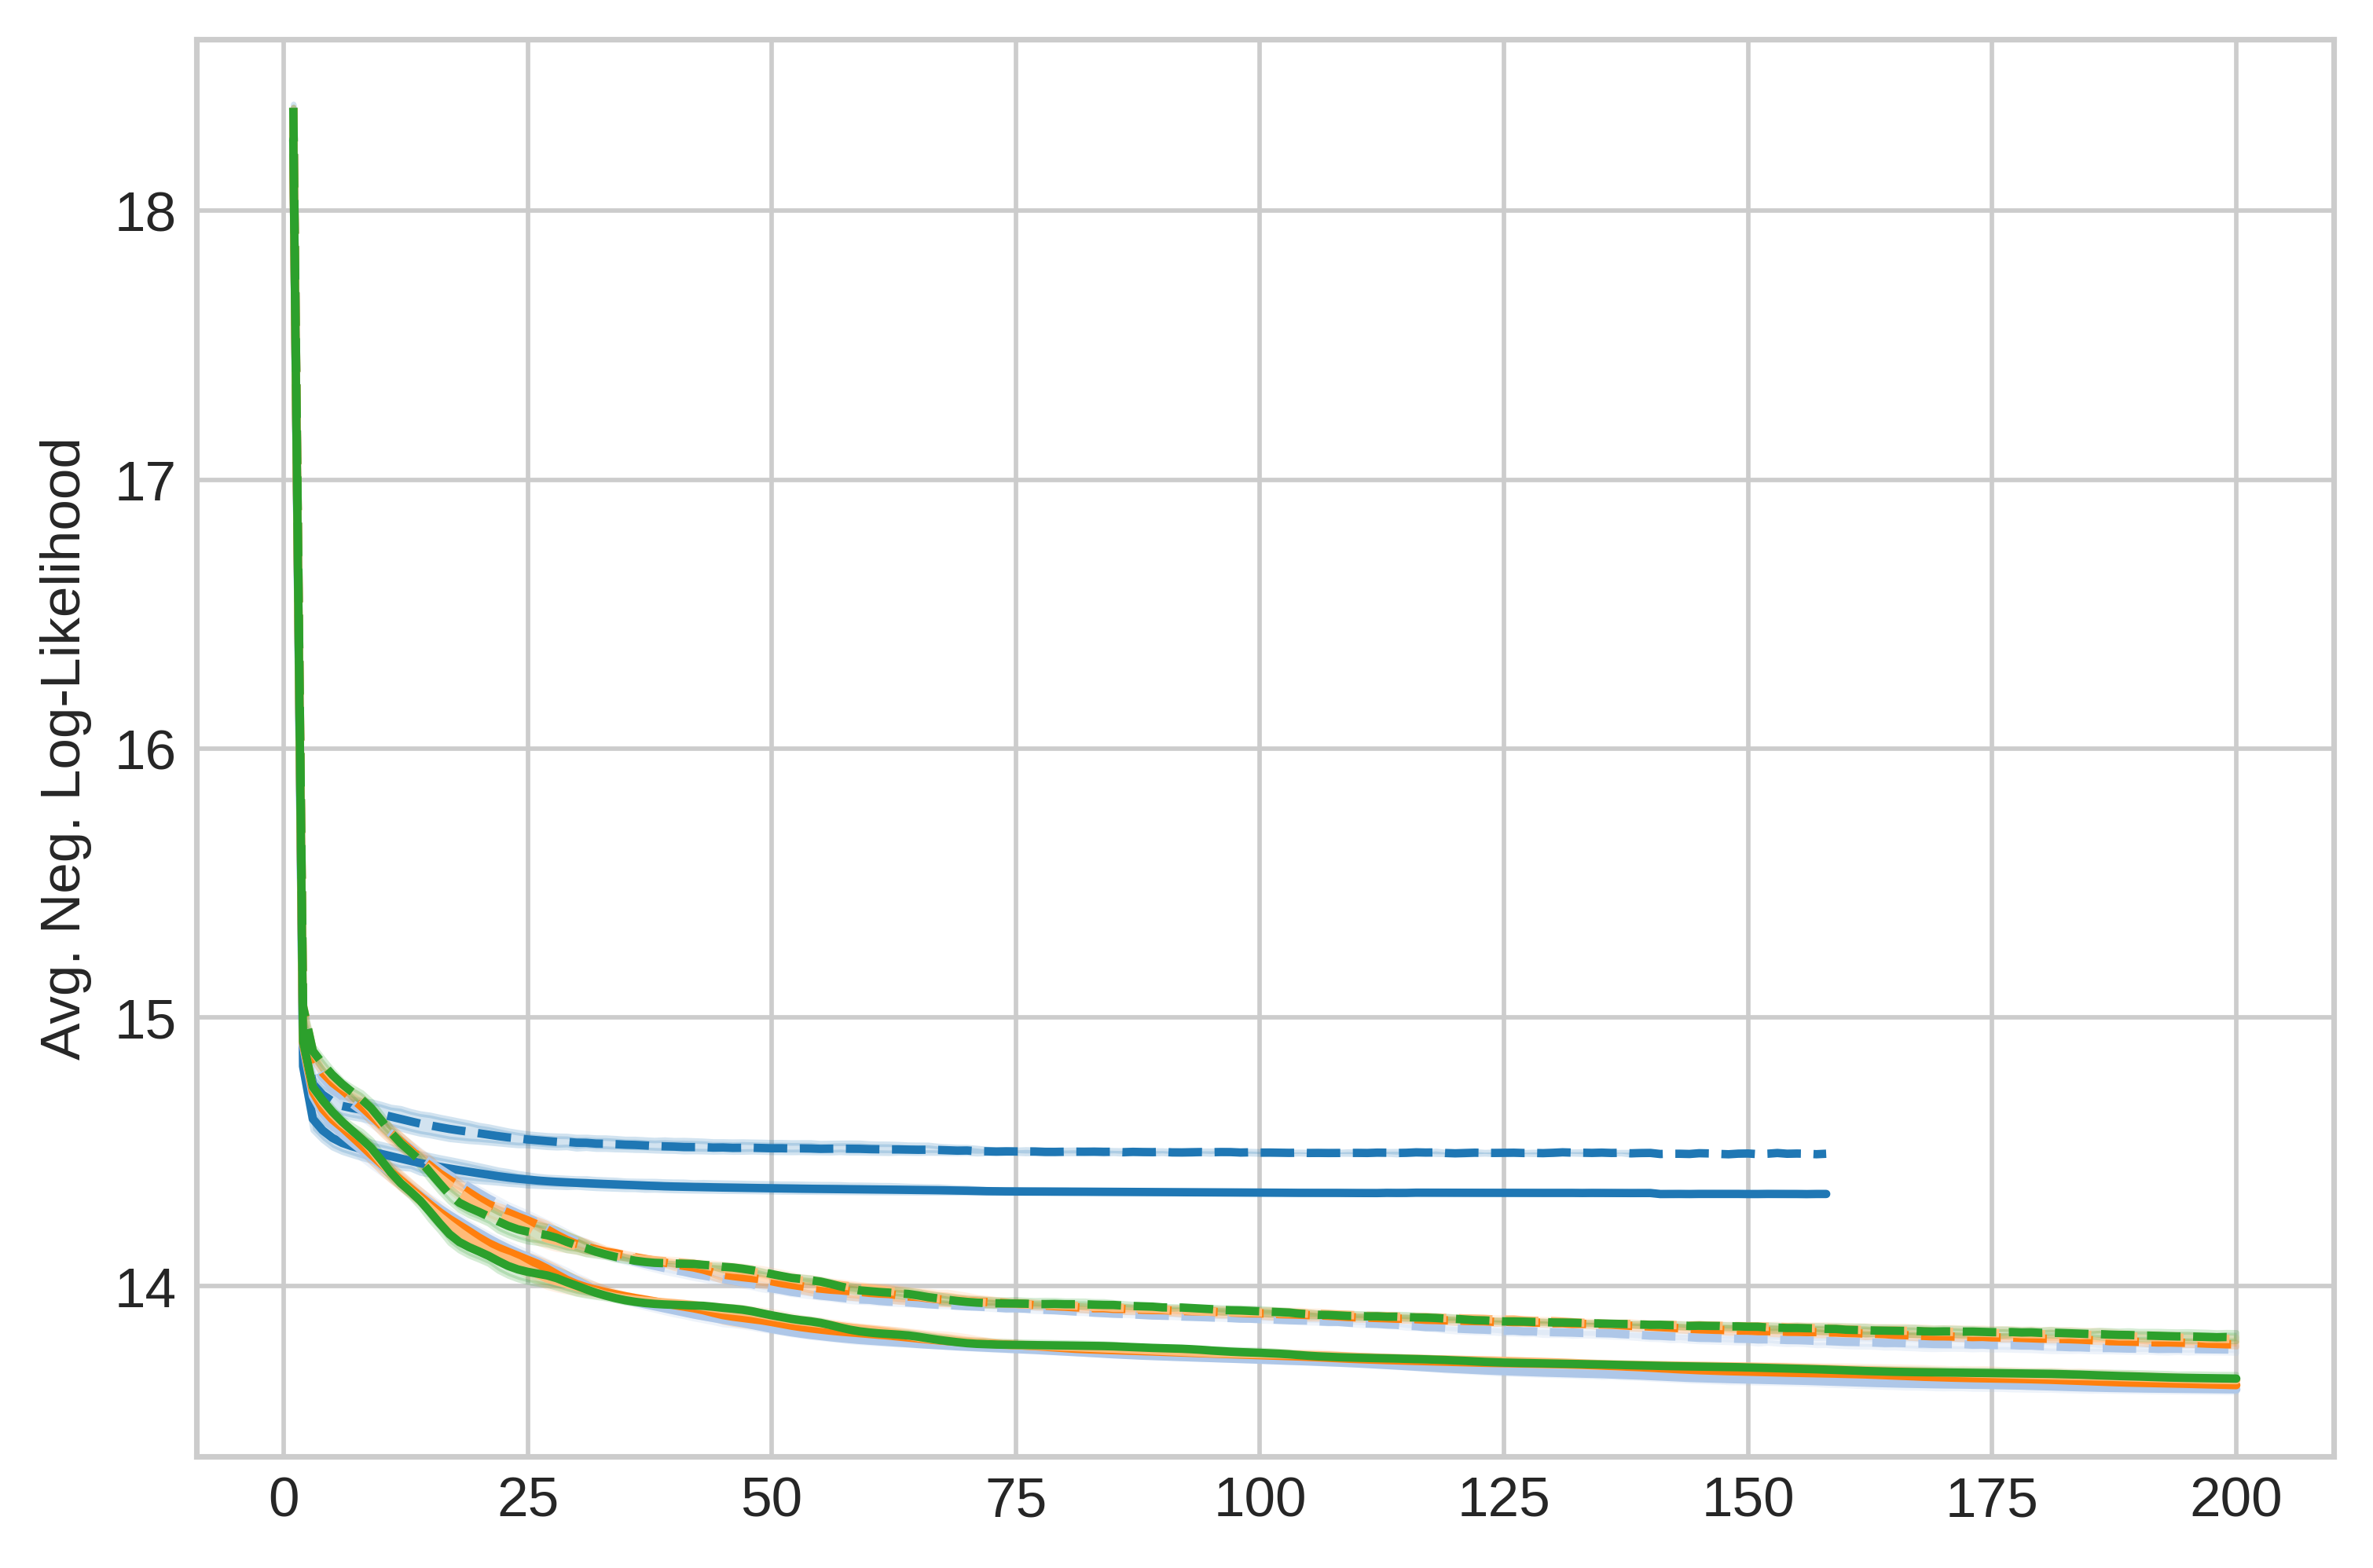

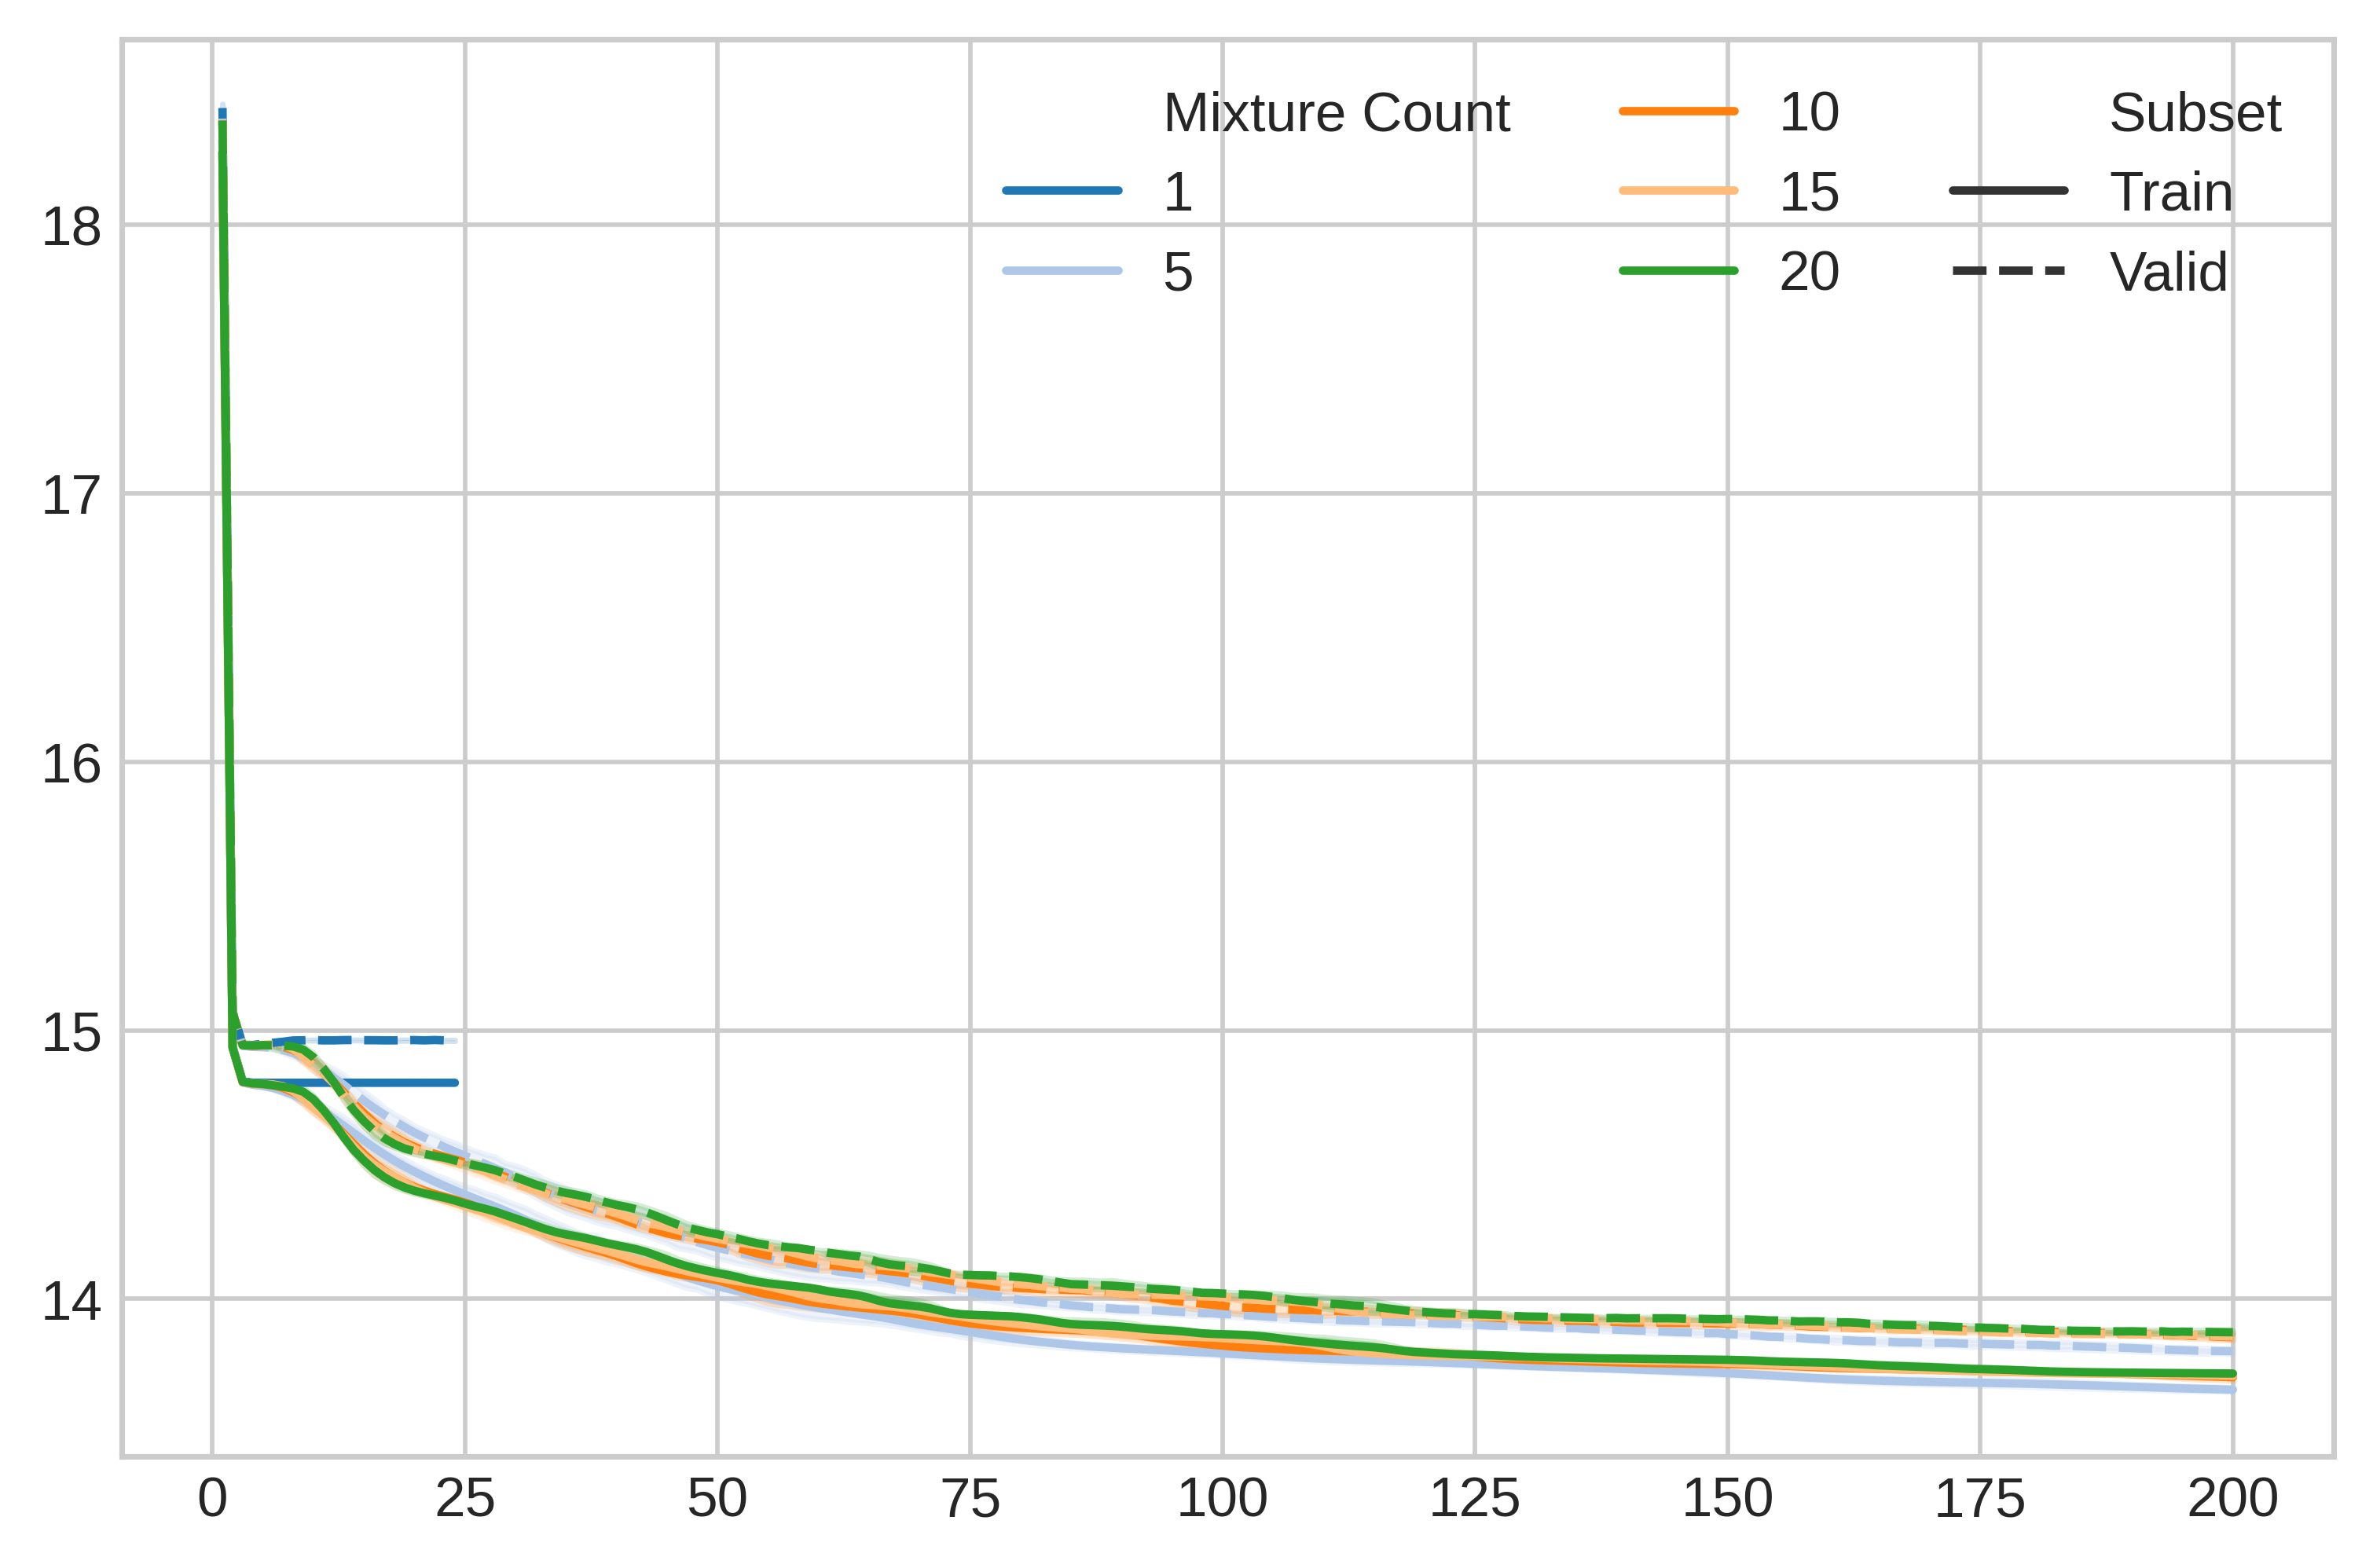

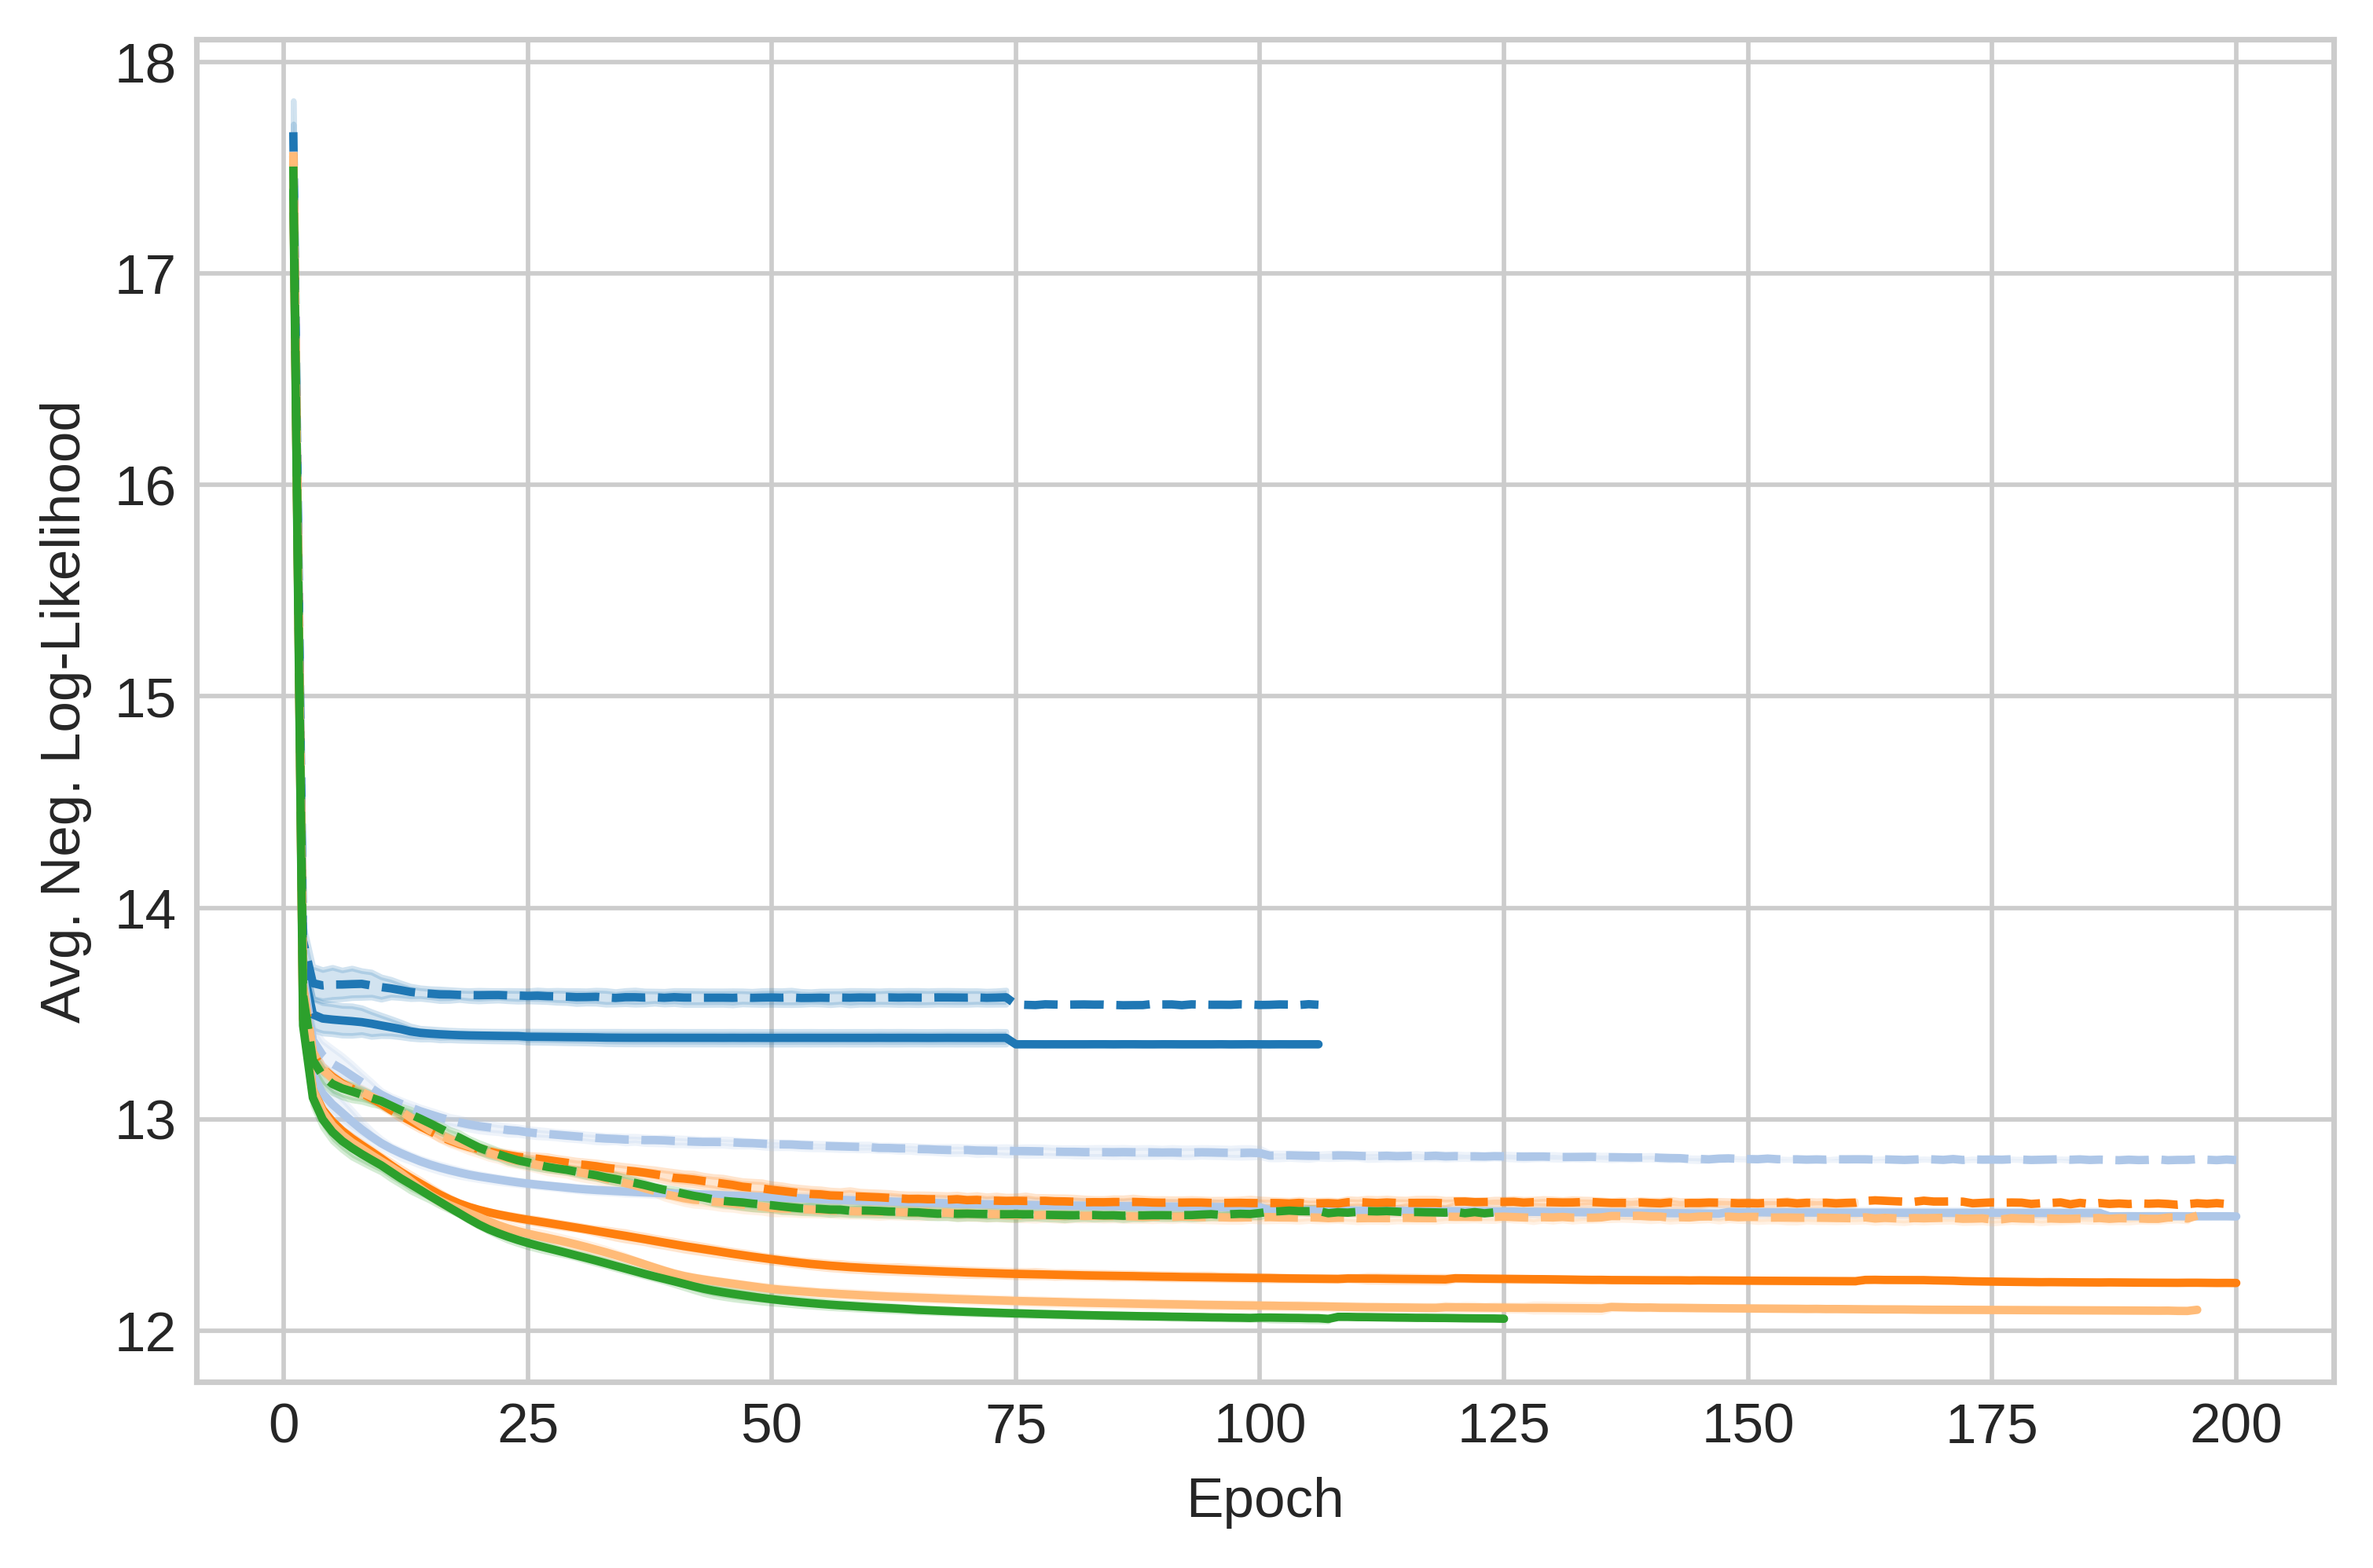

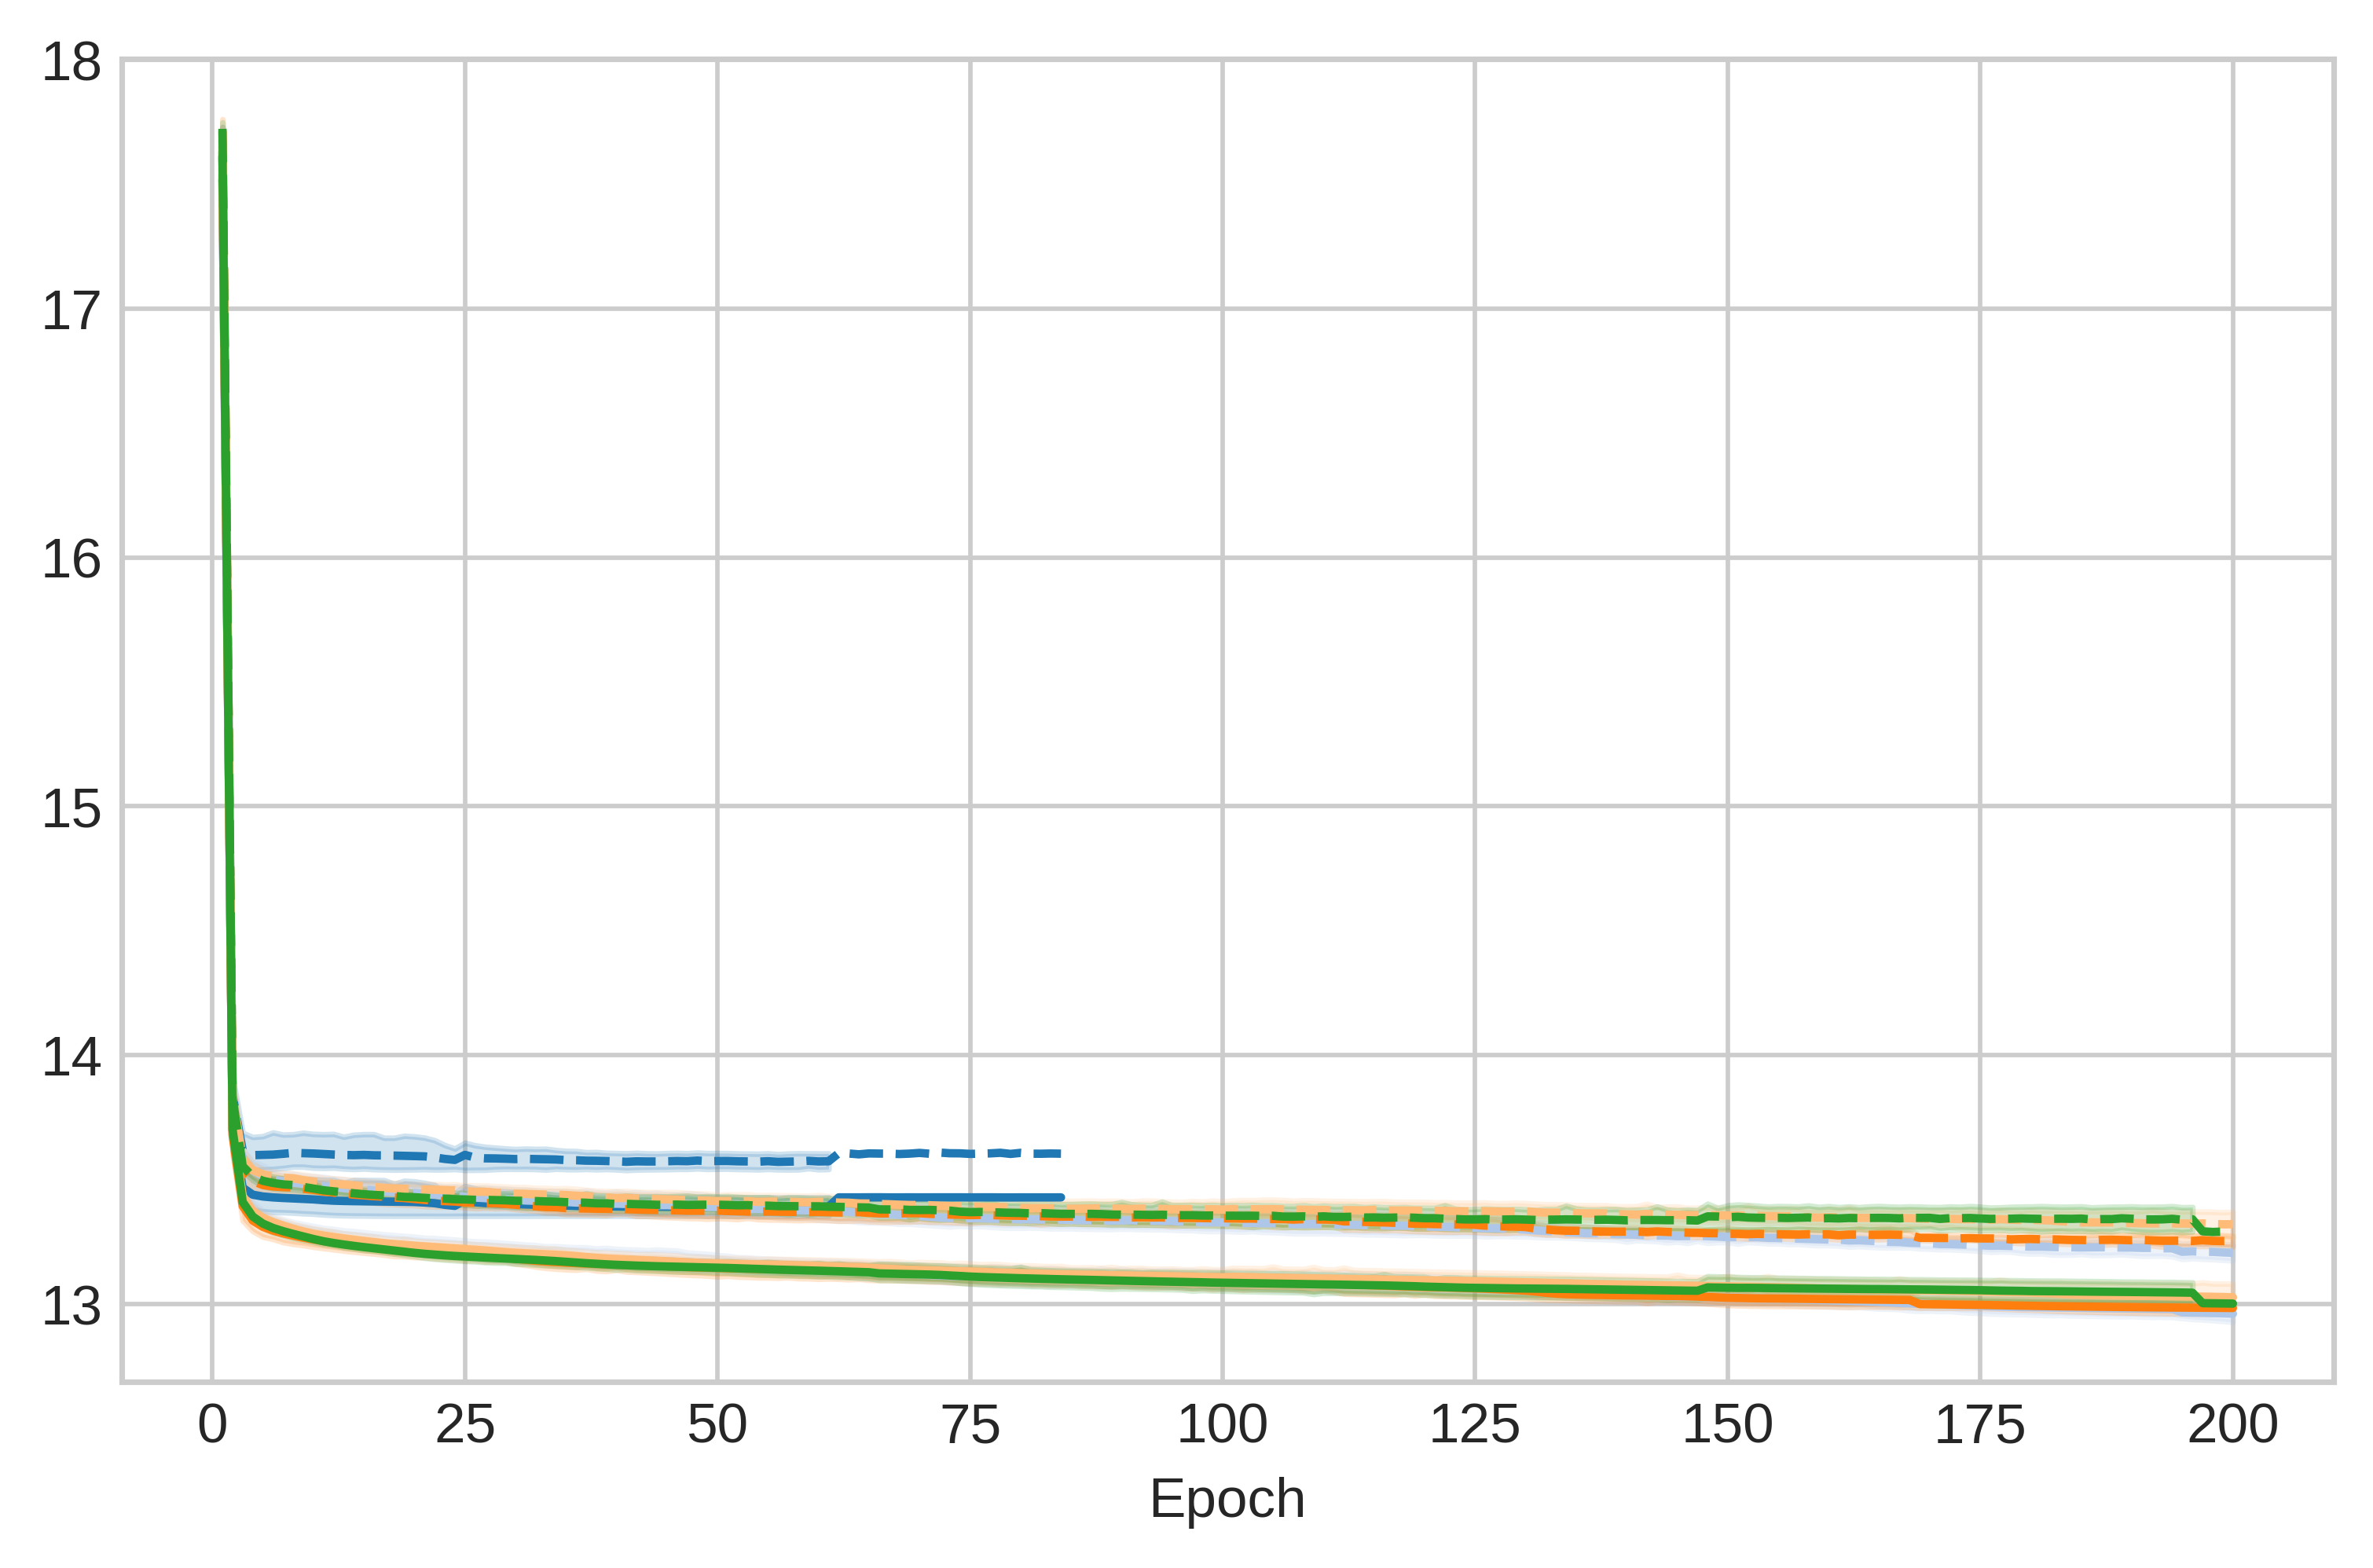

In [12]:
fig = plt.figure(figsize=(6, 4), dpi=512)

ax = fig.gca()
# ax.set_title("BIN-G", loc="left")
sns.lineplot(
    data=bin_g,
    x="Epoch",
    y="Avg. Neg. Log-Likelihood",
    hue="Mixture Count",
    style="Subset",
    ax=ax,
    palette="tab20",
)
ax.legend_ = None
ax.set_xlabel(None)
#ax.set_ylabel(None)

fig.tight_layout()
fig.savefig("outputs/einet/bin-g-training-log.pdf")

fig = plt.figure(figsize=(6, 4), dpi=512)

ax = fig.gca()
# ax.set_title("BIN-G w/o Repetition", loc="left")
sns.lineplot(
    data=bin_g_no_repeat,
    x="Epoch",
    y="Avg. Neg. Log-Likelihood",
    hue="Mixture Count",
    style="Subset",
    ax=ax,
    palette="tab20",
)
ax.legend(ncol=3)
ax.set_xlabel(None)
ax.set_ylabel(None)

fig.tight_layout()
fig.savefig("outputs/einet/bin-g-no-repetition-training-log.pdf")

fig = plt.figure(figsize=(6, 4), dpi=512)

ax = fig.gca()
# ax.set_title("RAT-SPN", loc="left")
sns.lineplot(
    data=rat_spn1,
    x="Epoch",
    y="Avg. Neg. Log-Likelihood",
    hue="Mixture Count",
    style="Subset",
    ax=ax,
    palette="tab20",
)
ax.legend_ = None
#ax.set_ylabel(None)

fig.tight_layout()
fig.savefig("outputs/einet/rat-spn-01-training-log.pdf")

fig = plt.figure(figsize=(6, 4), dpi=512)

ax = fig.gca()
# ax.set_title("RAT-SPN", loc="left")
sns.lineplot(
    data=rat_spn2,
    x="Epoch",
    y="Avg. Neg. Log-Likelihood",
    hue="Mixture Count",
    style="Subset",
    ax=ax,
    palette="tab20",
)
ax.legend_ = None
ax.set_ylabel(None)

fig.tight_layout()
fig.savefig("outputs/einet/rat-spn-02-training-log.pdf")

In [13]:
from tqdm.auto import tqdm

In [14]:
dataloader_train = torch.utils.data.DataLoader(
    dataset=utils.dataset.ObjectCooccurrenceCOCODataset(
        "dataset/coco2017-cooccurences-train.csv"
    ),
    batch_size=1024,
)
dataloader_valid = torch.utils.data.DataLoader(
    dataset=utils.dataset.ObjectCooccurrenceCOCODataset(
        "dataset/coco2017-cooccurences-valid.csv"
    ),
    batch_size=1024,
)

device = "cuda"

args_best = torch.load(
    "outputs/rat_spn_rg_depth_02_repetition_05/mixture-15-seed-4-params.pt"
)

einet_best = EiNetForest(args_best["region_graph"], args_best["args"])
einet_best.initialize()
einet_best.load_state_dict(args_best["params"])

log_likelihood_train = log_likelihood(dataloader_train, einet_best, device)
log_posterior_train = log_posterior(dataloader_train, einet_best, device)

log_likelihood_valid = log_likelihood(dataloader_valid, einet_best, device)
log_posterior_valid = log_posterior(dataloader_valid, einet_best, device)

In [15]:
total_params = sum(p.numel() for p in einet_best.parameters())
avg_train_ll = log_likelihood_train / len(dataloader_train.dataset)
avg_train_lp = log_posterior_train / len(dataloader_train.dataset)

avg_valid_ll = log_likelihood_valid / len(dataloader_valid.dataset)
avg_valid_lp = log_posterior_valid / len(dataloader_valid.dataset)

train_bic = log_likelihood_train - total_params / 2 * log(len(dataloader_train.dataset))

In [16]:
with open("outputs/overall/rat-spn.json", "w", encoding="utf-8") as file:
    json.dump(
        dict(
            model="EiNet RAT-SPN-01",
            kind="Advanced Model",
            total_parameters=total_params,
            avg_train_nll=-avg_train_ll,
            avg_test_nll=-avg_valid_ll,
            avg_train_nlp=-avg_train_lp,
            avg_test_nlp=-avg_valid_lp,
            neg_bic=-train_bic,
        ),
        file,
        ensure_ascii=False,
        indent=4,
    )